## Objective:

To explore a fetal heart rate dataset through visual and statistical techniques to identify patterns and possible indicators of fetal distress.


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Cardiotocographic.csv")

df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


## 1. Data Cleaning and Preparation:
## i. Check data types and missing values

In [ ]:
# Basic information about dataset
df.info()

# Checking for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


## ii. Handle missing values

In [ ]:
# Checking for duplicates
df.duplicated().sum()

np.int64(2)

In [ ]:
df.drop_duplicates(inplace=True)

##iii. Check for inconsistent data types

In [ ]:
# If any columns are object but should be numeric:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            print(f"Non-convertible column: {col}")

##iv. Detect and treat outliers

* Use boxplots

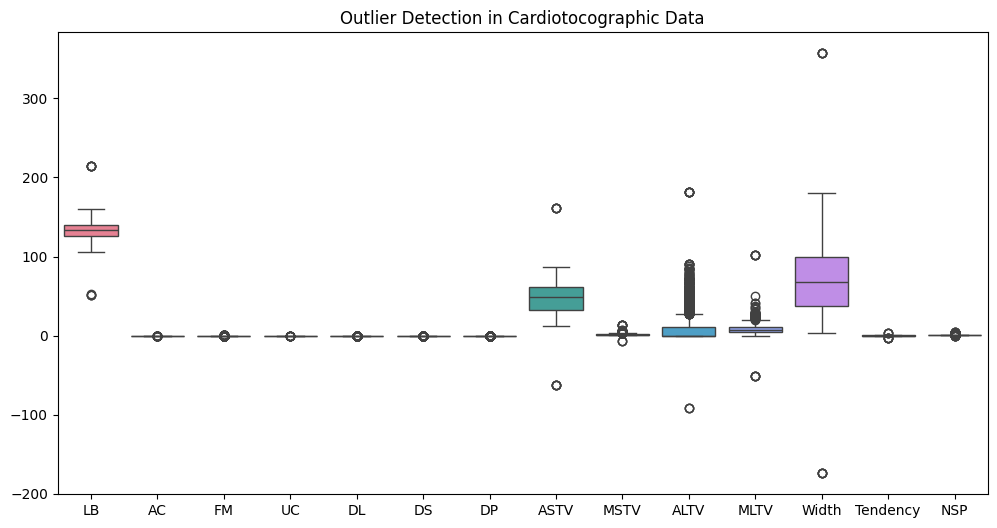

In [ ]:
# Detecting outliers using boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Outlier Detection in Cardiotocographic Data")
plt.show()


## 2. Statistical Summary

In [ ]:
# Statistical summary
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2103.000000,2104.000000,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,133.342023,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.280546,70.461052,0.316672,1.304797
std,11.268266,0.004392,0.067571,0.003340,0.003344,0.000142,0.000840,18.812403,1.174084,21.212676,7.774969,42.939806,0.645855,0.644857
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.000000
75%,140.000000,0.005650,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [ ]:
# Statistical summary with mean, median, std, IQR
summary = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Std': df.std(),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})

print(summary)

                Mean      Median        Std        IQR
LB        133.342023  133.000000  11.268266  14.000000
AC          0.003220    0.001634   0.004392   0.005650
FM          0.009904    0.000000   0.067571   0.002568
UC          0.004394    0.004486   0.003340   0.004678
DL          0.001897    0.000000   0.003344   0.003292
DS          0.000003    0.000000   0.000142   0.000000
DP          0.000175    0.000000   0.000840   0.000000
ASTV       47.012459   49.000000  18.812403  29.000000
MSTV        1.364345    1.200000   1.174084   1.000000
ALTV       10.295650    0.000000  21.212676  11.000000
MLTV        8.280546    7.400000   7.774969   6.300000
Width      70.461052   67.486468  42.939806  63.000000
Tendency    0.316672    0.000000   0.645855   1.000000
NSP         1.304797    1.000000   0.644857   0.000000


##Interesting findings:
* Most variables have close mean and median values, showing fairly balanced data.

* ALTV is skewed, with many zeros but some large values.

* DS and DP show almost no variation (all zeros).

* Variables like Width and ASTV vary widely, shown by large std and IQR.

* NSP has no variation here, possibly a constant or categorical feature.

##3. Data Visualization
3.1 Histograms and Boxplots

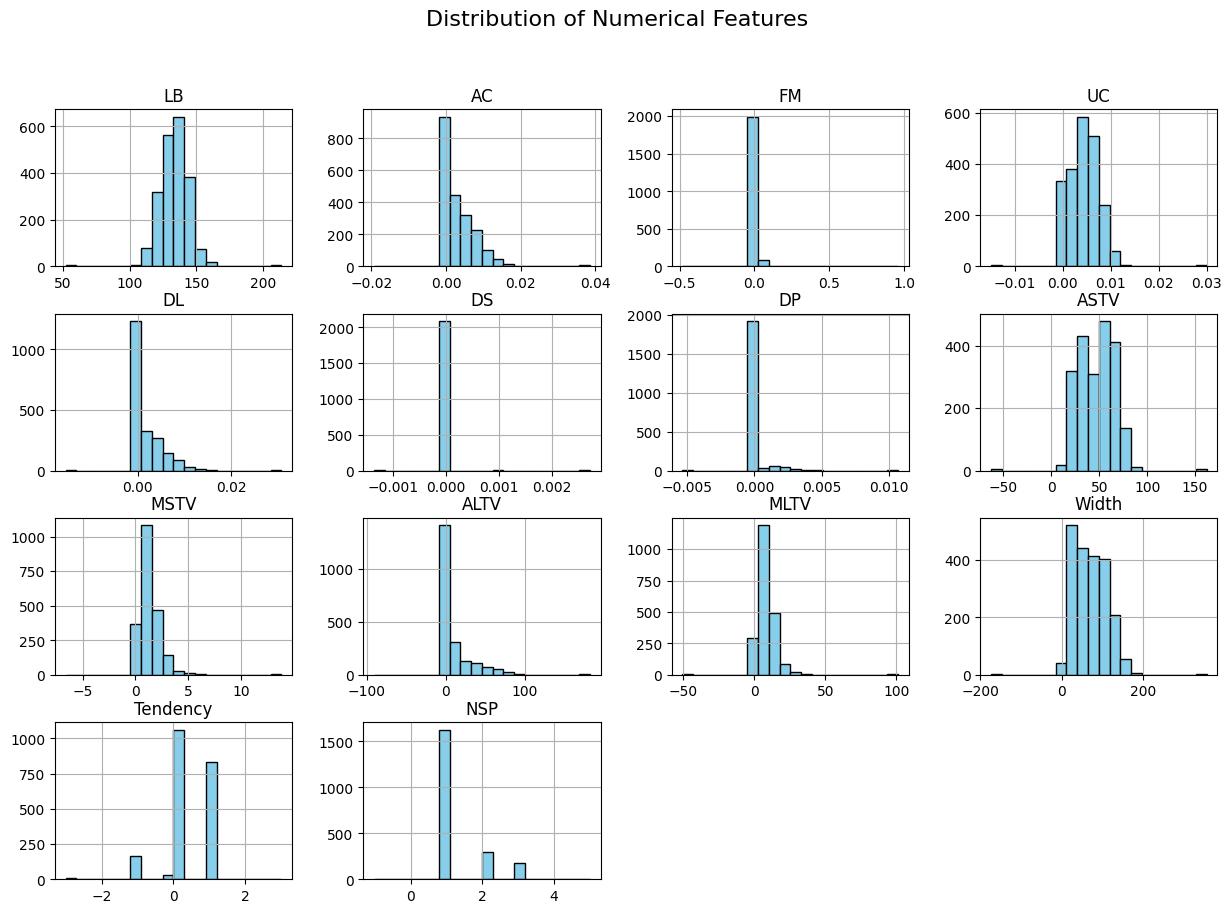

In [ ]:
df.hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


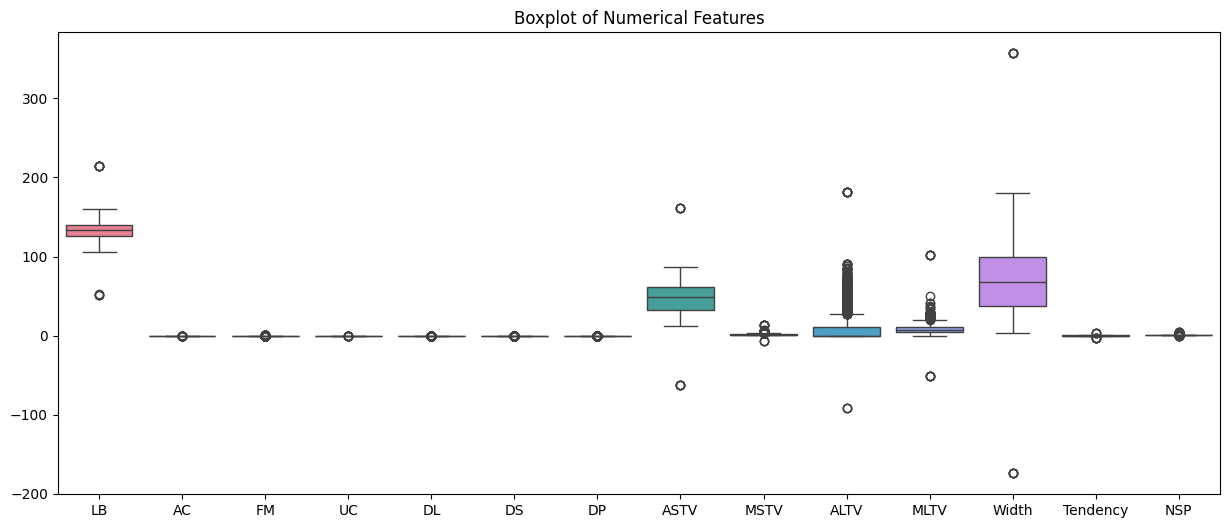

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.title("Boxplot of Numerical Features")
plt.show()


## Correlation heatmap helps find relationships between numerical variables.

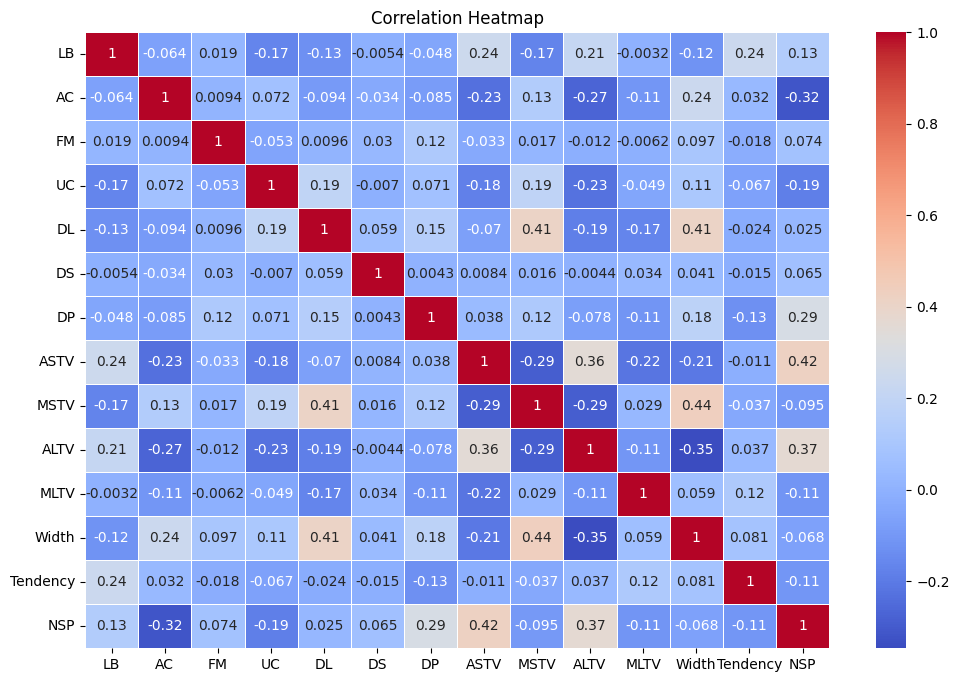

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Pairplots provide scatter plots between all pairs of numerical variables.

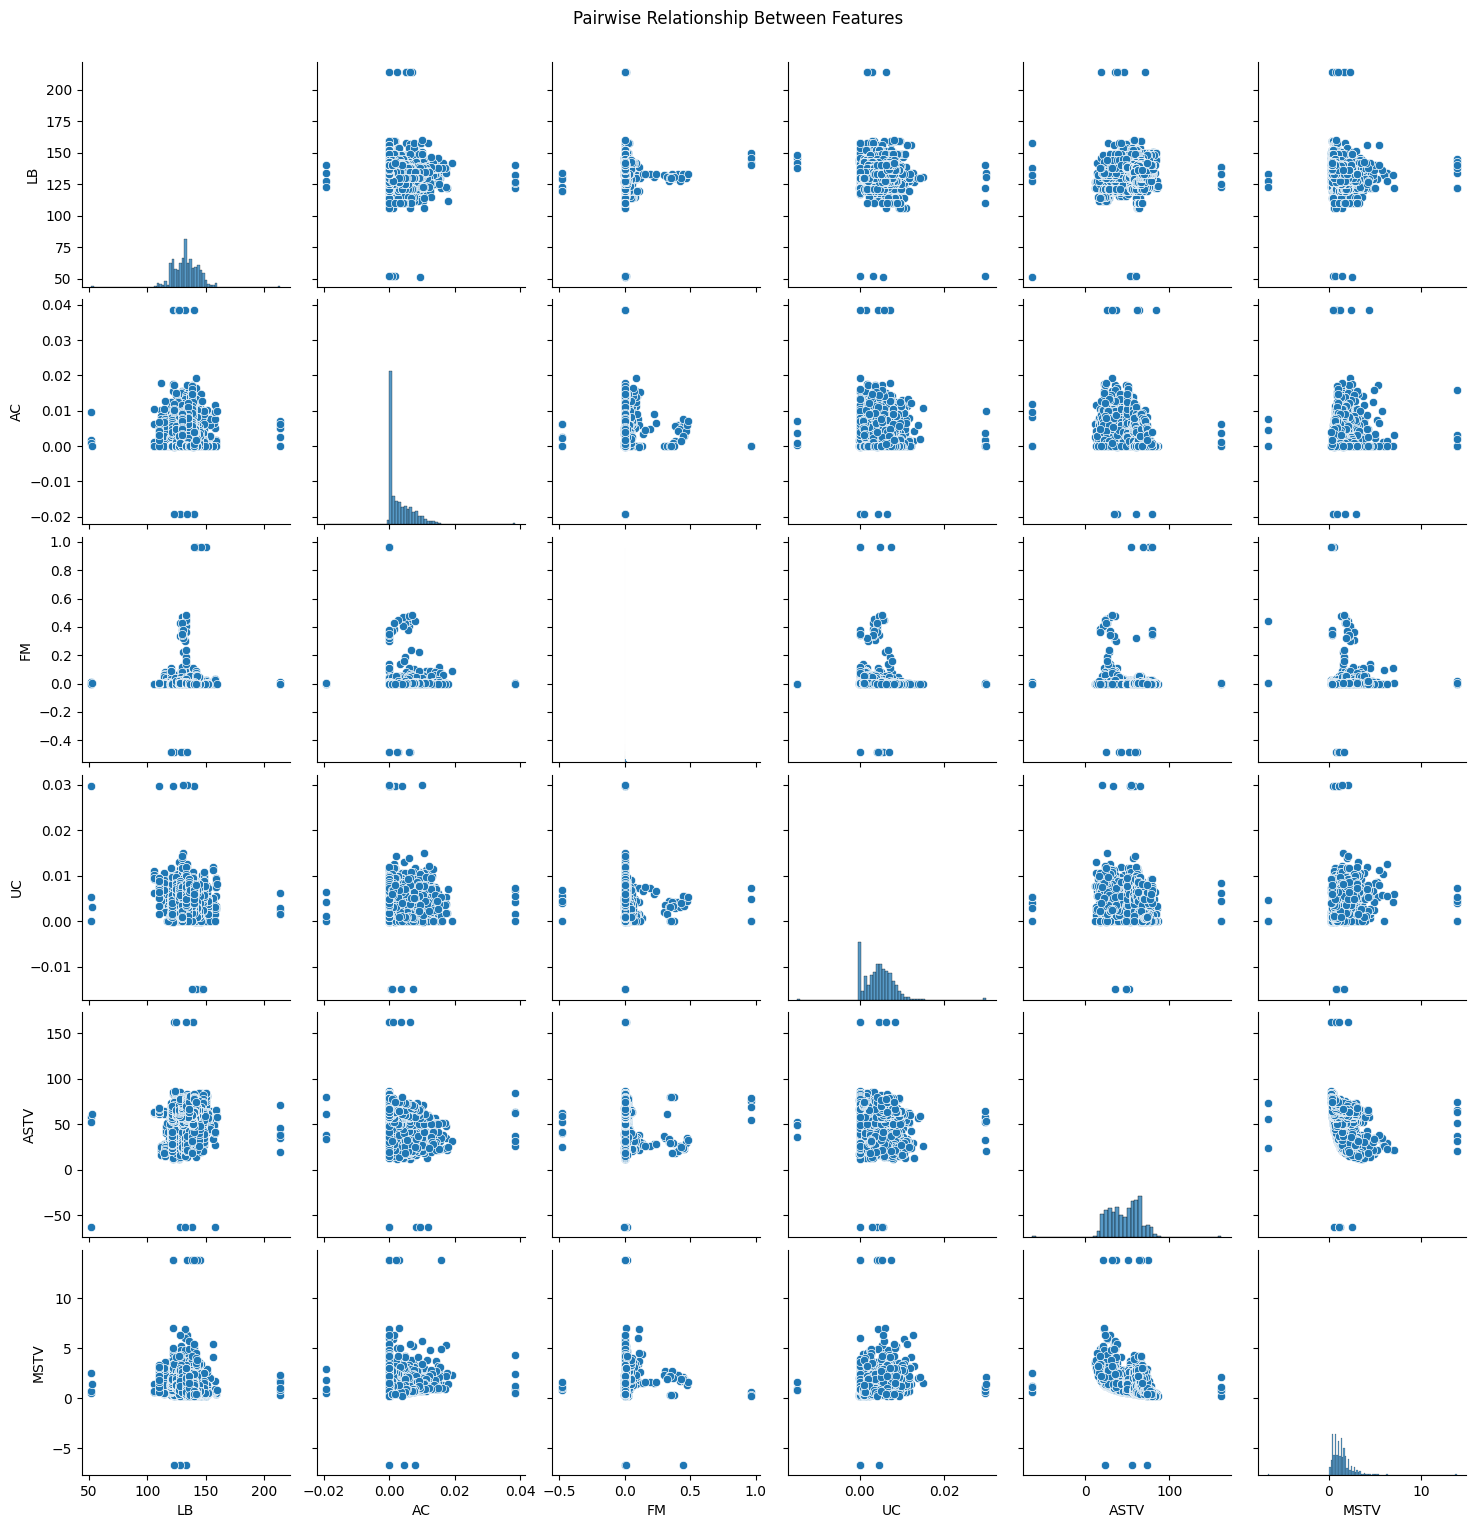

In [ ]:
sns.pairplot(df[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV']])
plt.suptitle("Pairwise Relationship Between Features", y=1.02)
plt.show()


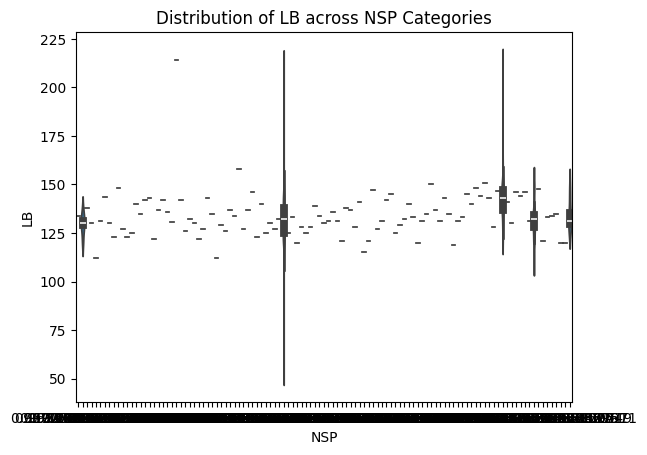

In [ ]:
# Violin plot to see distribution of LB across NSP (assuming NSP is a category)
sns.violinplot(x='NSP', y='LB', data=df)
plt.title('Distribution of LB across NSP Categories')
plt.show()

##4. Pattern Recognition & Insights
4.1 Correlation Observations

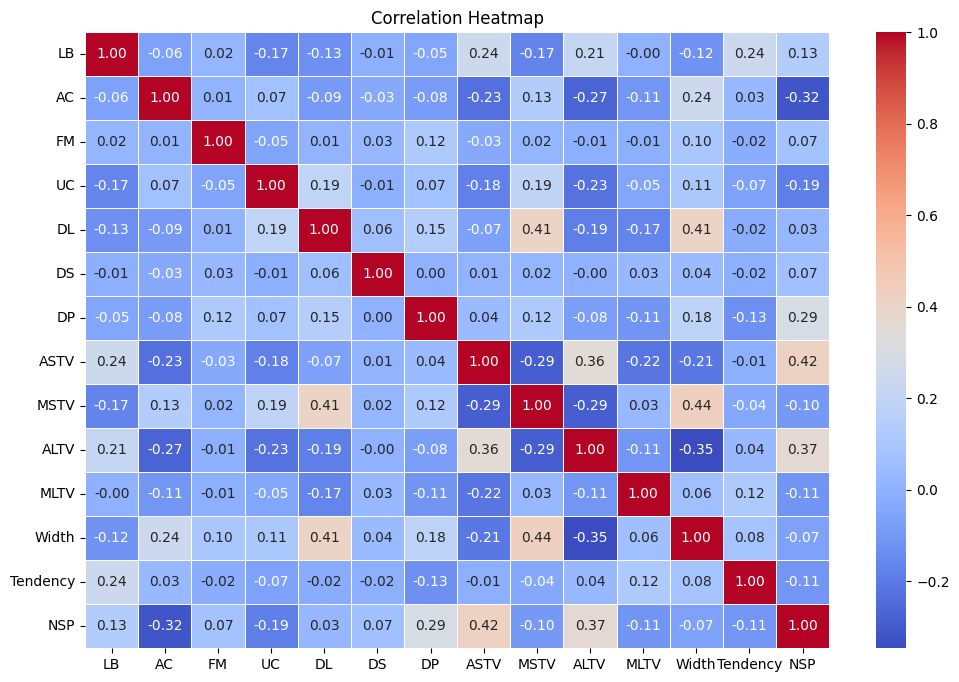

In [ ]:
# Generate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap for visual correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the heatmap above, we can observe the following:

ASTV (Abnormal Short Term Variability) is positively correlated with ALTV (Abnormal Long Term Variability), which is expected since both indicate irregular fetal heart rate patterns.

MSTV (Mean Short Term Variability) shows a negative correlation with deceleration-related variables such as DL, DS, and DP. This suggests that as decelerations increase (a sign of fetal stress), short-term variability tends to decrease.

Features like FM (Fetal Movements) and UC (Uterine Contractions) exhibit weaker correlations with most other variables, likely due to their independent physiological effects that vary case-by-case.

These correlations are helpful for understanding feature relationships and can guide feature selection in predictive modeling.

In [ ]:
# Check if any column might represent time
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

## 5. Conclusion

This exploratory analysis highlighted key features like ASTV, ALTV, and decelerations (DL, DS, DP) that are important in detecting abnormal fetal heart patterns. We found a strong positive correlation between ASTV and ALTV, and a negative relationship between decelerations and short-term variability, which may signal fetal distress.
Outliers were addressed to reduce their effect, but the absence of time-related data limited analysis of trends over time.
These findings provide a solid foundation for future work, such as building predictive models or incorporating time-based data to better understand fetal health changes.